In [187]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from tabulate import tabulate
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# Đọc dữ liệu từ tệp CSV
df = pd.read_csv("botswana_bank_customer_churn.csv")

In [188]:
# Kiểm tra trùng lặp trong dữ liệu
duplicates = df.duplicated()  # Trả về một Series với True nếu dòng bị trùng lặp
print("Số dòng trùng lặp:", duplicates.sum())

# Hiển thị các dòng trùng lặp (nếu có)
print("Các dòng trùng lặp:")
print(df[duplicates])

Số dòng trùng lặp: 0
Các dòng trùng lặp:
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, First Name, Date of Birth, Gender, Marital Status, Number of Dependents, Occupation, Income, Education Level, Address, Contact Information, Customer Tenure, Customer Segment, Preferred Communication Channel, Credit Score, Credit History Length, Outstanding Loans, Churn Flag, Churn Reason, Churn Date, Balance, NumOfProducts, NumComplaints]
Index: []

[0 rows x 25 columns]


# Thông tin cơ bản về dữ liệu

In [189]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   RowNumber                        115640 non-null  int64  
 1   CustomerId                       115640 non-null  object 
 2   Surname                          115640 non-null  object 
 3   First Name                       115640 non-null  object 
 4   Date of Birth                    115640 non-null  object 
 5   Gender                           115640 non-null  object 
 6   Marital Status                   115640 non-null  object 
 7   Number of Dependents             115640 non-null  int64  
 8   Occupation                       115640 non-null  object 
 9   Income                           115640 non-null  float64
 10  Education Level                  115640 non-null  object 
 11  Address                          115640 non-null  object 
 12  Co

In [190]:
df.isnull().sum()

RowNumber                               0
CustomerId                              0
Surname                                 0
First Name                              0
Date of Birth                           0
Gender                                  0
Marital Status                          0
Number of Dependents                    0
Occupation                              0
Income                                  0
Education Level                         0
Address                                 0
Contact Information                     0
Customer Tenure                         0
Customer Segment                        0
Preferred Communication Channel         0
Credit Score                            0
Credit History Length                   0
Outstanding Loans                       0
Churn Flag                              0
Churn Reason                       101546
Churn Date                         101546
Balance                                 0
NumOfProducts                     

In [191]:
print(df.describe())

           RowNumber  Number of Dependents         Income  Customer Tenure  \
count  115640.000000         115640.000000  115640.000000    115640.000000   
mean    57820.500000              2.502923   52641.363046        15.490591   
std     33382.536902              1.707249   27429.756390         8.654217   
min         1.000000              0.000000    5000.960000         1.000000   
25%     28910.750000              1.000000   28857.070000         8.000000   
50%     57820.500000              3.000000   52658.110000        15.000000   
75%     86730.250000              4.000000   76364.157500        23.000000   
max    115640.000000              5.000000   99999.510000        30.000000   

        Credit Score  Credit History Length  Outstanding Loans     Churn Flag  \
count  115640.000000          115640.000000      115640.000000  115640.000000   
mean      574.299775              15.546602       25502.731792       0.121878   
std       159.067499               8.654630       1412

# Tiền xử lí dữ liệu

In [192]:
#Lọc cột không cần thiết
#Các cột không cần thiết bao gồm RowNumber, CustomerId, Surname, First Name, Date of Birth, Address, Contact Information, Churn Reason, và Churn Date

columns_to_drop = [
    'RowNumber', 'CustomerId', 'Surname', 'First Name',
    'Occupation', 'Address', 'Contact Information',
    'Churn Reason', 'Churn Date'
]

# Lọc cột không cần thiết nếu chúng tồn tại trong DataFrame
filtered_data = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Kiểm tra kết quả sau khi lọc
print(filtered_data.head())  # In ra 5 dòng đầu của dữ liệu đã được lọc
print(filtered_data.columns)  # In ra danh sách các cột còn lại trong dữ liệu


  Date of Birth  Gender Marital Status  Number of Dependents    Income  \
0     8/29/1987    Male       Divorced                     3  77710.14   
1      2/7/2000  Female        Married                     1  58209.87   
2      2/3/1954  Female         Single                     1   9794.01   
3     1/15/1991  Female       Divorced                     5  15088.98   
4      4/8/1992  Female       Divorced                     2  60726.56   

  Education Level  Customer Tenure Customer Segment  \
0     High School               30           Retail   
1     High School               27              SME   
2     High School               14           Retail   
3     High School               23        Corporate   
4        Master's               22        Corporate   

  Preferred Communication Channel  Credit Score  Credit History Length  \
0                           Phone           397                     24   
1                           Email           665                     10   
2 

In [193]:
# Xử lý ngày sinh và tính tuổi
from datetime import datetime
import pandas as pd

# Chuyển đổi cột 'Date of Birth' thành datetime, nếu có lỗi thì sẽ gán NaT
filtered_data['Date of Birth'] = pd.to_datetime(filtered_data['Date of Birth'], errors='coerce')

# Tính tuổi dựa trên ngày sinh và thay thế cột 'Date of Birth' bằng cột 'age'
filtered_data['age'] = (pd.to_datetime('today') - filtered_data['Date of Birth']).dt.days // 365

# loại bỏ cột 'Date of Birth' và chỉ giữ lại tuổi
filtered_data = filtered_data.drop(columns=['Date of Birth'])

In [194]:
# Duyệt qua các cột phân loại (object)
for col in filtered_data.columns:
    if filtered_data[col].dtype == 'object':
        # Tính giá trị đếm
        value_counts = filtered_data[col].value_counts().sort_values(ascending=False)

        # Chuyển kết quả value_counts thành bảng
        print(f"Value counts for {col}:")
        print(tabulate(value_counts.reset_index(), headers=["Value", "Count"], tablefmt="fancy_grid"))
        print("\n" + "="*50 + "\n")

Value counts for Gender:
╒════╤═════════╤═════════╕
│    │ Value   │   Count │
╞════╪═════════╪═════════╡
│  0 │ Female  │   57830 │
├────┼─────────┼─────────┤
│  1 │ Male    │   57810 │
╘════╧═════════╧═════════╛


Value counts for Marital Status:
╒════╤══════════╤═════════╕
│    │ Value    │   Count │
╞════╪══════════╪═════════╡
│  0 │ Single   │   38684 │
├────┼──────────┼─────────┤
│  1 │ Divorced │   38539 │
├────┼──────────┼─────────┤
│  2 │ Married  │   38417 │
╘════╧══════════╧═════════╛


Value counts for Education Level:
╒════╤═════════════╤═════════╕
│    │ Value       │   Count │
╞════╪═════════════╪═════════╡
│  0 │ Master's    │   28970 │
├────┼─────────────┼─────────┤
│  1 │ Diploma     │   28950 │
├────┼─────────────┼─────────┤
│  2 │ High School │   28868 │
├────┼─────────────┼─────────┤
│  3 │ Bachelor's  │   28852 │
╘════╧═════════════╧═════════╛


Value counts for Customer Segment:
╒════╤═══════════╤═════════╕
│    │ Value     │   Count │
╞════╪═══════════╪═════════

In [195]:
# Mã hóa nhị phân các cột phân loại với 2 giá trị
filtered_data['Gender'] = filtered_data['Gender'].map({'Female': 1, 'Male': 0})
filtered_data['Preferred Communication Channel'] = filtered_data['Preferred Communication Channel'].map({'Email': 1, 'Phone': 0})

# Mã hóa các cột phân loại với nhiều giá trị và thay thế các cột cũ
filtered_data = pd.get_dummies(filtered_data, columns=['Marital Status', 'Education Level', 'Customer Segment'], drop_first=True)
filtered_data = filtered_data.astype({col: int for col in filtered_data.select_dtypes(include=['bool']).columns})

# Kiểm tra kết quả sau khi mã hóa
print(filtered_data.head())

   Gender  Number of Dependents    Income  Customer Tenure  \
0       0                     3  77710.14               30   
1       1                     1  58209.87               27   
2       1                     1   9794.01               14   
3       1                     5  15088.98               23   
4       1                     2  60726.56               22   

   Preferred Communication Channel  Credit Score  Credit History Length  \
0                                0           397                     24   
1                                1           665                     10   
2                                1           715                     21   
3                                0           747                     17   
4                                1           549                     25   

   Outstanding Loans  Churn Flag    Balance  NumOfProducts  NumComplaints  \
0           41959.74           0  211359.05              1              0   
1            8916.67  

In [196]:
# Chuẩn bị dữ liệu
X = filtered_data.drop(['Churn Flag'], axis=1)
y = filtered_data['Churn Flag']

In [197]:
# Phân tích thống kê cơ bản của dữ liệu
X.describe()


,Gender,Number of Dependents,Income,Customer Tenure,Preferred Communication Channel,Credit Score,Credit History Length,Outstanding Loans,Balance,NumOfProducts,NumComplaints,age,Marital Status_Married,Marital Status_Single,Education Level_Diploma,Education Level_High School,Education Level_Master's,Customer Segment_Retail,Customer Segment_SME
count,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000
mean,0.500086,2.502923,52641.363046,15.490591,0.501937,574.299775,15.546602,25502.731792,124639.209748,2.999274,4.991724,46.946913,0.332212,0.334521,0.250346,0.249637,0.250519,0.329739,0.336415
std,0.500002,1.707249,27429.756390,8.654217,0.499998,159.067499,8.654630,14127.859827,72210.476638,1.411361,3.159283,16.726232,0.471009,0.471825,0.433214,0.432805,0.433314,0.470120,0.472485
min,0.000000,0.000000,5000.960000,1.000000,0.000000,300.000000,1.000000,1000.430000,1.060000,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,28857.070000,8.000000,0.000000,436.000000,8.000000,13226.060000,61991.915000,2.000000,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,52658.110000,15.000000,1.000000,574.000000,16.000000,25505.285000,124505.890000,3.000000,5.000000,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,76364.157500,23.000000,1.000000,712.000000,23.000000,37742.250000,187122.922500,4.000000,8.000000,61.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,5.000000,99999.510000,30.000000,1.000000,850.000000,30.000000,49999.690000,249998.910000,5.000000,10.000000,76.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Count (số lượng bản ghi): Tất cả các cột đều có 115,640 bản ghi (tức là không có giá trị thiếu).
Mean (Giá trị trung bình):
Cột Gender: Trung bình gần 0.5 (giải thích rằng có khoảng 50% dữ liệu là nam và 50% là nữ, nếu mã hóa 0 = nữ và 1 = nam).
Cột Income: Trung bình khoảng 52,641.36, tức là thu nhập trung bình của khách hàng khá cao.
Cột Balance: Trung bình là khoảng 124,639.21, cho thấy số dư trung bình của khách hàng rất cao.
Cột Credit Score: Trung bình là 574.3, một mức khá trung bình cho điểm tín dụng.
Cột NumOfProducts: Trung bình là 2.99, cho thấy khách hàng thường sử dụng khoảng 3 sản phẩm từ ngân hàng.
Các cột nhị phân (ví dụ: Gender, Marital Status, Preferred Communication Channel) có giá trị trung bình khoảng 0.5 (giải thích là có sự phân chia gần đều giữa các lớp).
Standard Deviation (Độ lệch chuẩn):
Các cột như Income, Balance có độ lệch chuẩn lớn (lên đến 72,210 cho Balance), chỉ ra sự phân tán lớn trong các giá trị này.
Các cột như Gender, Marital Status có độ lệch chuẩn nhỏ (gần 0.5), vì đây là các cột nhị phân.
Min (Giá trị nhỏ nhất) và Max (Giá trị lớn nhất):
Các giá trị min và max cho thấy sự phân bố rộng của các trường như Income, Balance (ví dụ: Income từ 5,000 đến 99,999, Balance từ 1.06 đến 249,998.91).
Percentiles (Phân vị):
Các phân vị 25%, 50%, 75% cho thấy dữ liệu phân phối khá đồng đều, đặc biệt với các cột như Income, Balance, Credit Score. Một số cột có phân vị rất tập trung (ví dụ: Gender có phân vị chủ yếu ở 0 và 1).

# ma trận tương quan giữa các 

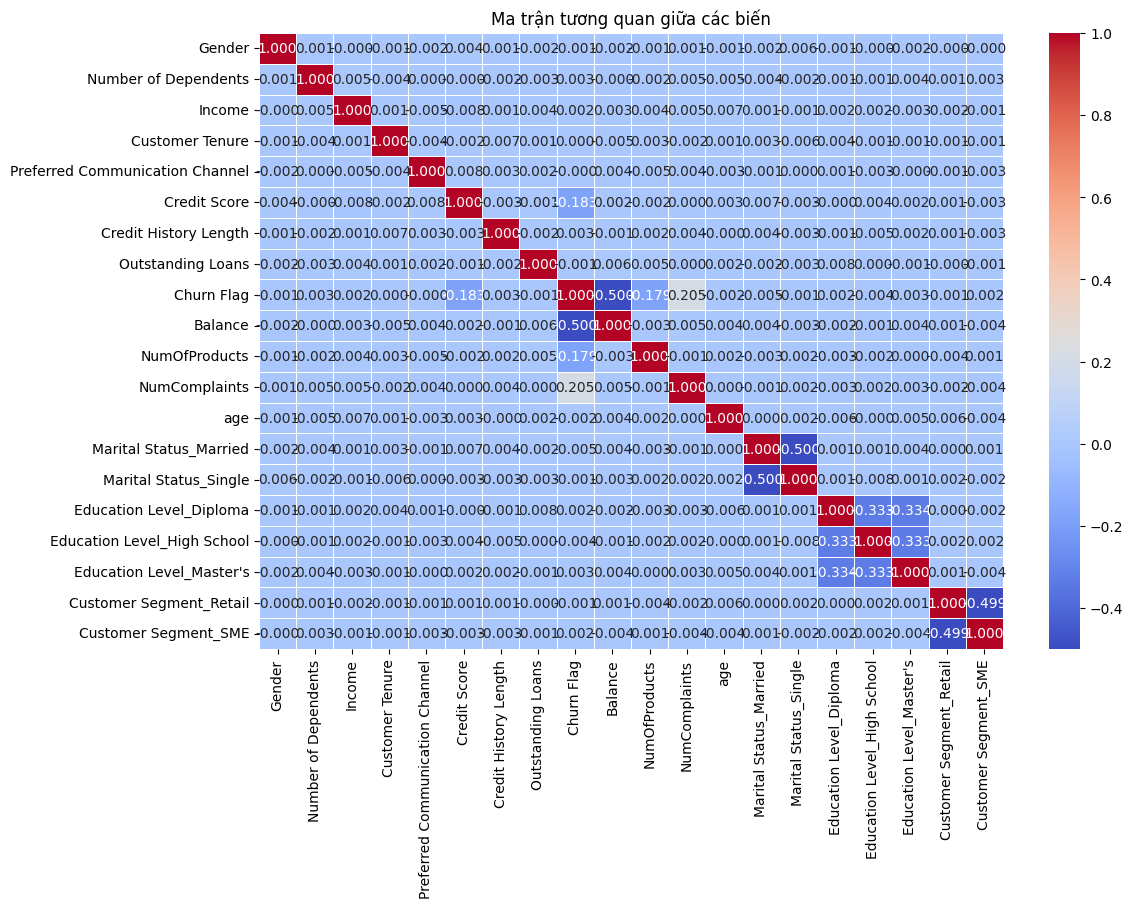

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính toán ma trận tương quan
correlation_matrix = filtered_data.corr()

# Tạo biểu đồ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', linewidths=0.5)

# Thiết lập tiêu đề cho biểu đồ
plt.title('Ma trận tương quan giữa các biến')
plt.show()

# biểu đồ tương quan giữa biến mục tiêu và biến 

C:\Users\yumin\AppData\Local\Temp\ipykernel_4216\1439546594.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_sorted.index, y=correlation_sorted.values, palette="viridis")


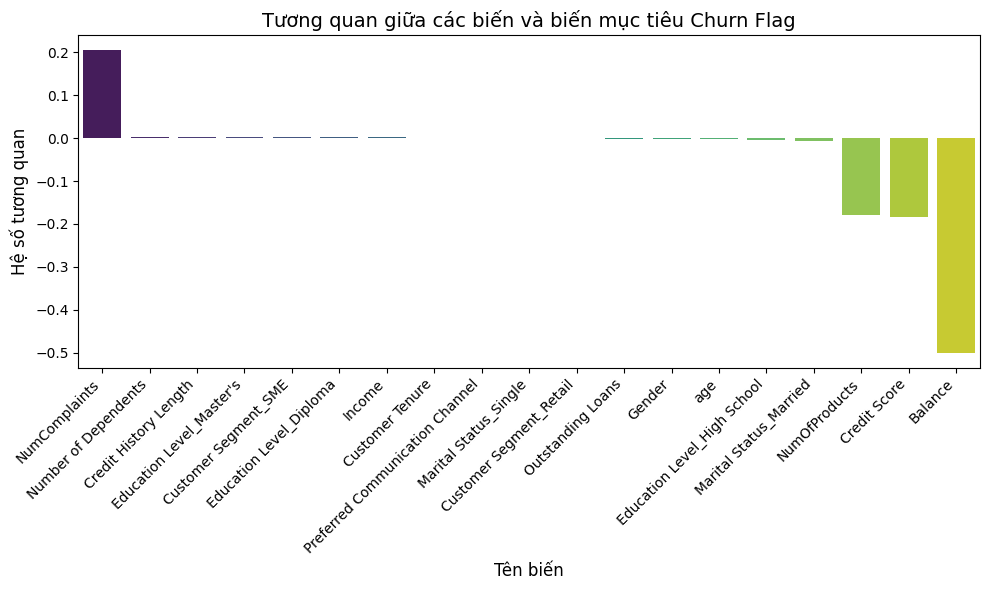

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính tương quan với biến mục tiêu
correlation_with_target = filtered_data.corr()['Churn Flag'].drop('Churn Flag')

# Sắp xếp tương quan theo giá trị
correlation_sorted = correlation_with_target.sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_sorted.index, y=correlation_sorted.values, palette="viridis")
plt.title("Tương quan giữa các biến và biến mục tiêu Churn Flag", fontsize=14)
plt.ylabel("Hệ số tương quan", fontsize=12)
plt.xlabel("Tên biến", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [200]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score,normalized_mutual_info_score
df_kmeans = filtered_data
X_kmeans = df_kmeans.drop(['Churn Flag'], axis=1)
# 2. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_kmeans_scaled = scaler.fit_transform(X_kmeans)

In [201]:
# Xác định số cụm tối ưu bằng Elbow Method
inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_kmeans_scaled)
    inertia.append(kmeans.inertia_)

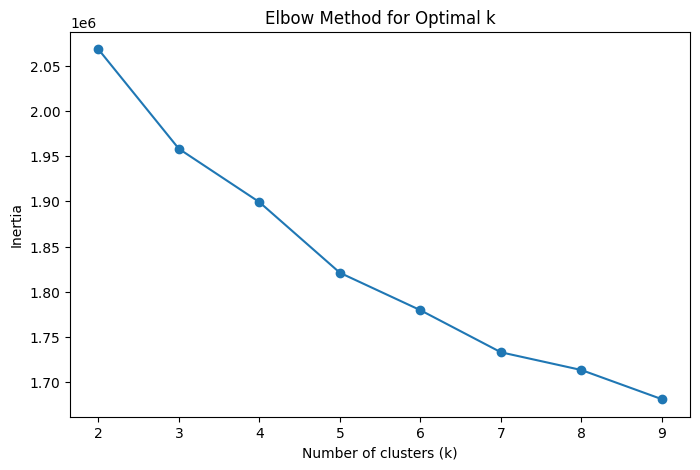

In [202]:
# Vẽ biểu đồ Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, '-o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K)
plt.show()

In [203]:
# Thực hiện phân cụm với số cụm tối ưu (ví dụ: k=4)
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(X_kmeans_scaled)

KMeans(n_clusters=4, random_state=42)

In [204]:
# Thêm nhãn cụm vào dữ liệu ban đầu
df_kmeans['Cluster'] = kmeans.labels_

In [205]:
# Tính toán chỉ số Silhouette
silhouette_avg = silhouette_score(X_kmeans_scaled, kmeans.labels_)
print(f"Silhouette Score for k={k_optimal}: {silhouette_avg}")

Silhouette Score for k=4: 0.059563355579102396


Silhouette Score thấp chỉ ra rằng một số mẫu nằm ở biên giới của các cụm, và các cụm không được phân tách rõ ràng.
Điều này được thấy trên biểu đồ, nơi các cụm chồng lấn nhiều ở một vài vùng.

In [206]:
# 1. Số lượng mẫu trong từng cụm
cluster_distribution = df_kmeans['Cluster'].value_counts()
print("Số lượng mẫu trong từng cụm:")
print(cluster_distribution)

Số lượng mẫu trong từng cụm:
Cluster
2    45385
0    25471
1    22542
3    22242
Name: count, dtype: int64


In [207]:
# 2. Phân phối nhãn `Churn Flag` trong từng cụm
churn_distribution_per_cluster = df_kmeans.groupby('Cluster')['Churn Flag'].value_counts(normalize=True).unstack()
print("Phân phối nhãn `Churn Flag` trong từng cụm (tỉ lệ %):")
print(churn_distribution_per_cluster * 100)

Phân phối nhãn `Churn Flag` trong từng cụm (tỉ lệ %):
Churn Flag          0          1
Cluster                         
0           87.880334  12.119666
1           87.933635  12.066365
2           87.579597  12.420403
3           88.085604  11.914396


In [208]:
# 3. Quan hệ giữa các đặc trưng và `Churn Flag` trong mỗi cụm
cluster_features_mean = df_kmeans.groupby('Cluster').mean()
print("Trung bình các đặc trưng theo cụm:")
print(cluster_features_mean)

Trung bình các đặc trưng theo cụm:
           Gender  Number of Dependents        Income  Customer Tenure  \
Cluster                                                                  
0        0.499470              2.512622  52507.876145        15.431039   
1        0.500311              2.488377  52656.709236        15.468725   
2        0.500914              2.503184  52596.395521        15.471081   
3        0.498876              2.506025  52870.432468        15.620763   

         Preferred Communication Channel  Credit Score  Credit History Length  \
Cluster                                                                         
0                               0.502846    574.175729              15.532881   
1                               0.499024    575.487534              15.477864   
2                               0.502501    573.462245              15.573560   
3                               0.502698    574.947037              15.576971   

         Outstanding Loans  Churn

Trung bình các đặc trưng trong các cụm:

Không có sự khác biệt rõ rệt về các đặc trưng quan trọng (như Income, Customer Tenure, hoặc Credit Score) giữa các cụm.

Đánh giá mối quan hệ giữa đầu ra tương ứng (Churn Flag) trong các cụm

Tỷ lệ Churn Flag giữa các cụm là tương đương nhau (~12%)


In [209]:
churn_features_mean = df_kmeans[df_kmeans['Churn Flag'] == 1].groupby('Cluster').mean()
print("Trung bình các đặc trưng của khách hàng rời bỏ theo cụm:")
print(churn_features_mean)

Trung bình các đặc trưng của khách hàng rời bỏ theo cụm:
           Gender  Number of Dependents        Income  Customer Tenure  \
Cluster                                                                  
0        0.509232              2.525429  53108.407826        15.317460   
1        0.504412              2.490441  52621.658390        15.245956   
2        0.498670              2.521909  52570.382022        15.576903   
3        0.478868              2.524906  53163.487068        15.802264   

         Preferred Communication Channel  Credit Score  Credit History Length  \
Cluster                                                                         
0                               0.486557    497.194040              15.549401   
1                               0.500735    499.590441              15.511765   
2                               0.505056    494.703388              15.661167   
3                               0.513962    495.007547              15.693585   

         Ou

In [210]:
# 4. Đánh giá sự tương quan giữa cụm và `Churn Flag`
ari = adjusted_rand_score(y, df_kmeans['Cluster'])
print(f"Adjusted Rand Index (ARI): {ari}")

Adjusted Rand Index (ARI): -0.0008545251947546512


ARI nhỏ hơn 0 cho thấy kết quả phân cụm gần như thậm chí không tương ứng với nhãn thực tế (Churn Flag).

In [211]:
nmi = normalized_mutual_info_score(y, df_kmeans['Cluster'])
print(f"Normalized Mutual Information Score (NMI): {nmi}")

Normalized Mutual Information Score (NMI): 2.162253856923766e-05


NMI rất thấp, cho thấy rằng thông tin được chia sẻ giữa các nhãn thực và cụm là không đáng kể.

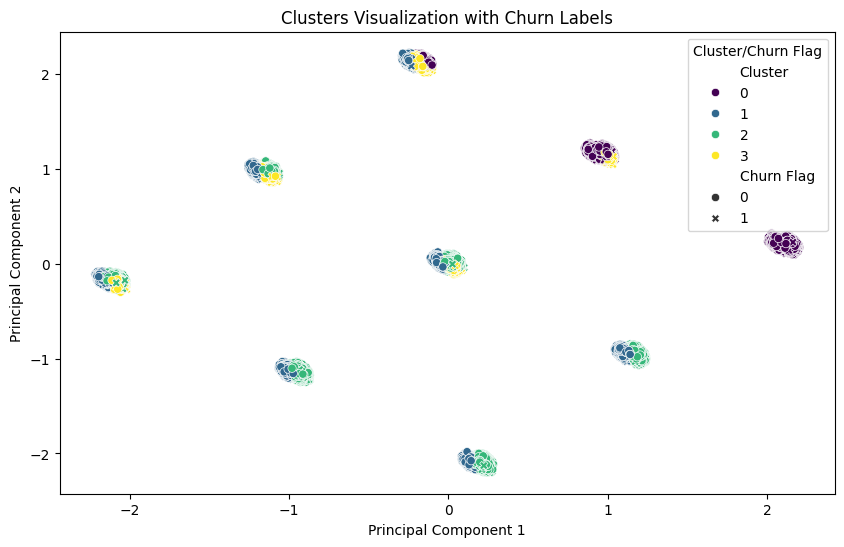

In [178]:
# Trực quan hóa phân phối của các cụm theo 2 thành phần chính (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_kmeans_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=df_kmeans['Cluster'], style=df_kmeans['Churn Flag'],
    palette='viridis', markers=['o', 'X']
)
plt.title('Clusters Visualization with Churn Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster/Churn Flag')
plt.show()


In [179]:
# Chia dữ liệu
from sklearn.model_selection import train_test_split
X_train_7_3, X_test_7_3, y_train_7_3, y_test_7_3 = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.model_selection import train_test_split
X_train_4_1, X_test_4_1, y_train_4_1, y_test_4_1 = train_test_split(X,y, test_size=0.2, random_state=42)
from sklearn.model_selection import train_test_split
X_train_6_4, X_test_6_4, y_train_6_4, y_test_6_4 = train_test_split(X,y, test_size=0.4, random_state=42)

In [180]:
# Chuẩn hóa chỉ trên tập huấn luyện
scaler = StandardScaler()
X_train_7_3 = scaler.fit_transform(X_train_7_3)  # Fit và transform trên tập huấn luyện
X_test_7_3 = scaler.transform(X_test_7_3)       # Chỉ transform trên tập kiểm tra
scaler_4_1 = StandardScaler()
X_train_4_1 = scaler_4_1.fit_transform(X_train_4_1)  # Fit và transform trên tập huấn luyện
X_test_4_1 = scaler_4_1.transform(X_test_4_1)        # Transform trên tập kiểm tra
scaler_6_4 = StandardScaler()
X_train_6_4 = scaler_6_4.fit_transform(X_train_6_4)  # Fit và transform trên tập huấn luyện
X_test_6_4 = scaler_6_4.transform(X_test_6_4)        # Transform trên tập kiểm tra

# Sử dụng PCA

In [181]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [182]:
from sklearn.decomposition import PCA

# Áp dụng PCA
pca = PCA(n_components=0.80)  # Giảm xuống còn 85%
X_pca = pca.fit_transform(X_scaled)

# Kiểm tra tỷ lệ phương sai giải thích của các thành phần
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Tỷ lệ phương sai giải thích: {explained_variance_ratio}")
print(f"Tổng phương sai giải thích: {np.sum(explained_variance_ratio)}")


Tỷ lệ phương sai giải thích: [0.07909061 0.07881694 0.07024523 0.0701712  0.05372196 0.0534506
 0.05322566 0.05305379 0.05279039 0.05258941 0.05244086 0.05233274
 0.05214732 0.05211263]
Tổng phương sai giải thích: 0.8261893270969674


In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Tạo DataFrame với các thành phần chính
pca_df = pd.DataFrame(X_pca)

# Thêm nhãn 'Churn Flag' vào DataFrame
pca_df['Churn Flag'] = y

# Sử dụng pairplot để hiển thị mối quan hệ giữa các thành phần chính và phân loại theo 'Churn Flag'
sns.pairplot(pca_df, hue='Churn Flag', palette='viridis', height=2)

# Hiển thị trực quan hóa
plt.suptitle('Pairplot của các thành phần chính sau PCA', y=1.02)
plt.show()



KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001CC34AD2DE0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

# Sử dụng LDA

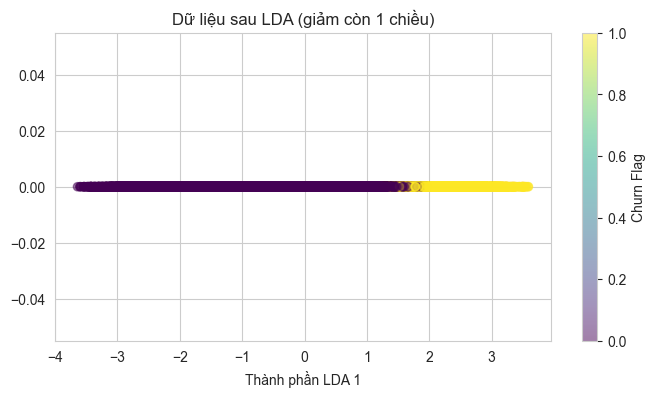

Tỷ lệ phương sai giải thích bởi thành phần LDA 1: 1.00


In [186]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Bước 3: Áp dụng LDA với 2 thành phần chính
lda = LDA(n_components=1)
X_lda_1d = lda.fit_transform(X_scaled, y)

# Bước 4: Trực quan hóa dữ liệu sau khi giảm chiều
plt.figure(figsize=(8, 4))
plt.scatter(X_lda_1d[:, 0], [0] * len(X_lda_1d), c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Thành phần LDA 1')
plt.title('Dữ liệu sau LDA (giảm còn 1 chiều)')
plt.colorbar(label='Churn Flag')
plt.grid(True)
plt.show()

# In thông tin quan trọng
explained_variance_ratio = lda.explained_variance_ratio_
print(f"Tỷ lệ phương sai giải thích bởi thành phần LDA 1: {explained_variance_ratio[0]:.2f}")

Hình vẽ thể hiện dữ liệu sau khi áp dụng giảm chiều với LDA, chỉ còn một chiều (thành phần LDA 1).
Các điểm dữ liệu được phân biệt bởi màu sắc, với hai màu chủ yếu là vàng và tím, tượng trưng cho hai lớp khác nhau của biến mục tiêu "Churn Flag" (Churn Flag = 0 và Churn Flag = 1).
Phân tách khá rõ: Dữ liệu giữa hai lớp (vàng và tím) có sự phân tách khá rõ ràng trong hầu hết các trường hợp, với phần lớn các điểm vàng nằm về một phía và các điểm tím nằm về phía còn lại.
Sự tách biệt mơ hồ ở giữa: Tuy nhiên, ở giữa hai lớp (vàng và tím), có một số điểm dữ liệu có sự pha trộn màu sắc (khoảng màu giao thoa giữa vàng và tím). Điều này chỉ ra rằng mặc dù LDA đã cố gắng giảm chiều và phân biệt các lớp, nhưng vẫn có sự chồng lấn giữa các điểm của hai lớp, dẫn đến các điểm không thể phân biệt rõ ràng.
Chồng lấn giữa vàng và tím: Các điểm ở vùng giữa có sự chồng lấn giữa hai màu (vàng và tím), cho thấy rằng một số điểm dữ liệu có thể thuộc vào cả hai lớp hoặc có tính chất không rõ ràng. Điều này có thể do các điểm dữ liệu có đặc trưng tương tự nhau ở không gian ban đầu, khiến LDA khó có thể phân loại chúng hoàn toàn chính xác khi giảm chiều xuống.
Ảnh hưởng của các đặc trưng không đủ phân biệt: Sự chồng lấn có thể là do đặc trưng dữ liệu không đủ mạnh để phân biệt giữa các lớp trong không gian giảm chiều. Nếu các đặc trưng không có sự khác biệt rõ ràng giữa các lớp, LDA sẽ không thể tìm ra sự phân tách rõ ràng trong không gian giảm chiều.
Hình vẽ sau khi giảm chiều bằng LDA cho thấy rằng mặc dù phương pháp này có thể phân biệt các lớp ở mức độ nhất định, nhưng vẫn có sự chồng lấn giữa các điểm dữ liệu ở vùng giữa hai lớp, cho thấy LDA không thể hoàn toàn tách biệt các lớp trong không gian một chiều. Điều này phản ánh một thách thức trong việc phân tích dữ liệu với đặc trưng không đủ phân biệt hoặc khi dữ liệu có sự chồng lấn giữa các lớp.

# Áp dụng mô hình hồi quy logistic và naive bayes trên tập dữ liệu đã xử lí

# 7-3

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Huấn luyện mô hình Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_7_3, y_train_7_3)


# Dự đoán trên tập huấn luyện
y_train_pred_lr_7_3 = logistic_regression.predict(X_train_7_3)

# Đánh giá mô hình trên tập huấn luyện
print("Classification Report for Logistic Regression on Training Set (7-3):")
print(classification_report(y_train_7_3, y_train_pred_lr_7_3))
print("Confusion Matrix for Logistic Regression on Training Set (7-3):")
print(confusion_matrix(y_train_7_3, y_train_pred_lr_7_3))

# Dự đoán trên tập kiểm tra
y_pred_lr_7_3 = logistic_regression.predict(X_test_7_3)

# Đánh giá mô hình trên tập kiểm tra
print("Classification Report for Logistic Regression on Test Set (7-3):")
print(classification_report(y_test_7_3, y_pred_lr_7_3))

print("Confusion Matrix for Logistic Regression on Test Set (7-3):")
print(confusion_matrix(y_test_7_3, y_pred_lr_7_3))

Classification Report for Logistic Regression on Training Set (7-3):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71127
           1       1.00      1.00      1.00      9821

    accuracy                           1.00     80948
   macro avg       1.00      1.00      1.00     80948
weighted avg       1.00      1.00      1.00     80948

Confusion Matrix for Logistic Regression on Training Set (7-3):
[[71115    12]
 [   46  9775]]
Classification Report for Logistic Regression on Test Set (7-3):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30419
           1       1.00      1.00      1.00      4273

    accuracy                           1.00     34692
   macro avg       1.00      1.00      1.00     34692
weighted avg       1.00      1.00      1.00     34692

Confusion Matrix for Logistic Regression on Test Set (7-3):
[[30412     7]
 [   17  4256]]


In [188]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Huấn luyện mô hình Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_7_3, y_train_7_3)

# Dự đoán trên tập huấn luyện
y_train_pred_nb_7_3 = gnb.predict(X_train_7_3)

# Đánh giá mô hình trên tập huấn luyện
print("Classification Report for Naive Bayes on Training Set (7-3):")
print(classification_report(y_train_7_3, y_train_pred_nb_7_3))
print("Confusion Matrix for Naive Bayes on Training Set (7-3):")
print(confusion_matrix(y_train_7_3, y_train_pred_nb_7_3))

# Dự đoán trên tập kiểm tra
y_pred_nb_7_3 = gnb.predict(X_test_7_3)

# Đánh giá mô hình trên tập kiểm tra
print("Classification Report for Naive Bayes on Test Set (7-3):")
print(classification_report(y_test_7_3, y_pred_nb_7_3))
print("Confusion Matrix for Naive Bayes on Test Set (7-3):")
print(confusion_matrix(y_test_7_3, y_pred_nb_7_3))


Classification Report for Naive Bayes on Training Set (7-3):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     71127
           1       0.95      0.80      0.87      9821

    accuracy                           0.97     80948
   macro avg       0.96      0.90      0.93     80948
weighted avg       0.97      0.97      0.97     80948

Confusion Matrix for Naive Bayes on Training Set (7-3):
[[70685   442]
 [ 1955  7866]]
Classification Report for Naive Bayes on Test Set (7-3):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     30419
           1       0.94      0.79      0.86      4273

    accuracy                           0.97     34692
   macro avg       0.96      0.89      0.92     34692
weighted avg       0.97      0.97      0.97     34692

Confusion Matrix for Naive Bayes on Test Set (7-3):
[[30219   200]
 [  877  3396]]


# 6-4

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Huấn luyện và đánh giá Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_6_4, y_train_6_4)


# Dự đoán trên tập huấn luyện
y_pred_train_6_4 = logistic_regression.predict(X_train_6_4)
print("Classification Report for Logistic Regression on Training Set (6:4)")
print(classification_report(y_train_6_4, y_pred_train_6_4))
print("Confusion Matrix for Logistic Regression on Training Set (6:4)")
print(confusion_matrix(y_train_6_4, y_pred_train_6_4))
# Dự đoán trên tập kiểm tra
y_pred_test_6_4 = logistic_regression.predict(X_test_6_4)
print("Classification Report for Logistic Regression on Test Set (6:4)")
print(classification_report(y_test_6_4, y_pred_test_6_4))
print("Confusion Matrix for Logistic Regression on Test Set (6:4)")
print(confusion_matrix(y_test_6_4, y_pred_test_6_4))


Classification Report for Logistic Regression on Training Set (6:4)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60970
           1       1.00      1.00      1.00      8414

    accuracy                           1.00     69384
   macro avg       1.00      1.00      1.00     69384
weighted avg       1.00      1.00      1.00     69384

Confusion Matrix for Logistic Regression on Training Set (6:4)
[[60963     7]
 [   42  8372]]
Classification Report for Logistic Regression on Test Set (6:4)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40576
           1       1.00      0.99      1.00      5680

    accuracy                           1.00     46256
   macro avg       1.00      1.00      1.00     46256
weighted avg       1.00      1.00      1.00     46256

Confusion Matrix for Logistic Regression on Test Set (6:4)
[[40566    10]
 [   45  5635]]


In [190]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Huấn luyện mô hình Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_6_4, y_train_6_4)

# Dự đoán trên tập huấn luyện
y_train_pred_6_4 = gnb.predict(X_train_6_4)

# Đánh giá trên tập huấn luyện
print("Classification Report for Naive Bayes on Training Set (6:4)")
print(classification_report(y_train_6_4, y_train_pred_6_4))
print("Confusion Matrix for Naive Bayes on Training Set (6:4)")
print(confusion_matrix(y_train_6_4, y_train_pred_6_4))

# Dự đoán trên tập kiểm tra
y_test_pred_6_4 = gnb.predict(X_test_6_4)

# Đánh giá trên tập kiểm tra
print("Classification Report for Naive Bayes on Test Set (6:4)")
print(classification_report(y_test_6_4, y_test_pred_6_4))
print("Confusion Matrix for Naive Bayes on Test Set (6:4)")
print(confusion_matrix(y_test_6_4, y_test_pred_6_4))


Classification Report for Naive Bayes on Training Set (6:4)
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     60970
           1       0.94      0.80      0.87      8414

    accuracy                           0.97     69384
   macro avg       0.96      0.90      0.93     69384
weighted avg       0.97      0.97      0.97     69384

Confusion Matrix for Naive Bayes on Training Set (6:4)
[[60556   414]
 [ 1646  6768]]
Classification Report for Naive Bayes on Test Set (6:4)
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     40576
           1       0.95      0.79      0.86      5680

    accuracy                           0.97     46256
   macro avg       0.96      0.89      0.92     46256
weighted avg       0.97      0.97      0.97     46256

Confusion Matrix for Naive Bayes on Test Set (6:4)
[[40320   256]
 [ 1177  4503]]


# 8-2

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Huấn luyện và đánh giá Logistic Regression
logistic_regression = LogisticRegression(max_iter=500)
logistic_regression.fit(X_train_4_1, y_train_4_1)


# Dự đoán trên tập huấn luyện
y_pred_train_4_1 = logistic_regression.predict(X_train_4_1)
print("Classification Report for Logistic Regression on Training Set (4:1)")
print(classification_report(y_train_4_1, y_pred_train_4_1))
print("Confusion Matrix for Logistic Regression on Training Set (4:1)")
print(confusion_matrix(y_train_4_1, y_pred_train_4_1))
# Dự đoán trên tập kiểm tra
y_pred_test_4_1 = logistic_regression.predict(X_test_4_1)
print("Classification Report for Logistic Regression on Test Set (4:1)")
print(classification_report(y_test_4_1, y_pred_test_4_1))
print("Confusion Matrix for Logistic Regression on Test Set (4:1)")
print(confusion_matrix(y_test_4_1, y_pred_test_4_1))


Classification Report for Logistic Regression on Training Set (4:1)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81245
           1       1.00      1.00      1.00     11267

    accuracy                           1.00     92512
   macro avg       1.00      1.00      1.00     92512
weighted avg       1.00      1.00      1.00     92512

Confusion Matrix for Logistic Regression on Training Set (4:1)
[[81229    16]
 [   52 11215]]
Classification Report for Logistic Regression on Test Set (4:1)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20301
           1       1.00      1.00      1.00      2827

    accuracy                           1.00     23128
   macro avg       1.00      1.00      1.00     23128
weighted avg       1.00      1.00      1.00     23128

Confusion Matrix for Logistic Regression on Test Set (4:1)
[[20298     3]
 [   13  2814]]


In [192]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Huấn luyện mô hình Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_4_1, y_train_4_1)

# Dự đoán trên tập huấn luyện
y_train_pred_4_1 = gnb.predict(X_train_4_1)

# Đánh giá trên tập huấn luyện
print("Classification Report for Naive Bayes on Training Set (4:1)")
print(classification_report(y_train_4_1, y_train_pred_4_1))
print("Confusion Matrix for Naive Bayes on Training Set (4:1)")
print(confusion_matrix(y_train_4_1, y_train_pred_4_1))

# Dự đoán trên tập kiểm tra
y_test_pred_4_1 = gnb.predict(X_test_4_1)

# Đánh giá trên tập kiểm tra
print("Classification Report for Naive Bayes on Test Set (4:1)")
print(classification_report(y_test_4_1, y_test_pred_4_1))
print("Confusion Matrix for Naive Bayes on Test Set (4:1)")
print(confusion_matrix(y_test_4_1, y_test_pred_4_1))


Classification Report for Naive Bayes on Training Set (4:1)
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     81245
           1       0.95      0.80      0.87     11267

    accuracy                           0.97     92512
   macro avg       0.96      0.90      0.93     92512
weighted avg       0.97      0.97      0.97     92512

Confusion Matrix for Naive Bayes on Training Set (4:1)
[[80739   506]
 [ 2219  9048]]
Classification Report for Naive Bayes on Test Set (4:1)
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     20301
           1       0.94      0.79      0.86      2827

    accuracy                           0.97     23128
   macro avg       0.96      0.89      0.92     23128
weighted avg       0.97      0.97      0.97     23128

Confusion Matrix for Naive Bayes on Test Set (4:1)
[[20164   137]
 [  586  2241]]


# Áp dụng mô hình hồi quy logistic với naive bayes trên tập dữ liệu đã giảm chiều PCA, LDA

# pca

In [193]:
# Chia dữ liệupca
from sklearn.model_selection import train_test_split
X_train_pca_7_3, X_test_pca_7_3, y_train_pca_7_3, y_test_pca_7_3 = train_test_split(X_pca, y, test_size=0.3, random_state=42)
X_train_pca_6_4, X_test_pca_6_4, y_train_pca_6_4, y_test_pca_6_4 = train_test_split(X_pca, y, test_size=0.4, random_state=42)
X_train_pca_8_2, X_test_pca_8_2, y_train_pca_8_2, y_test_pca_8_2 = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [194]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca_7_3, y_train_pca_7_3)
y_pred = gnb.predict(X_test_pca_7_3)
print("Classification Report for Naive Bayes on Training (pca) (7:3):")
print(classification_report(y_test_pca_7_3, y_pred))
y_pred_pca_nb_7_3 = gnb.predict(X_train_pca_7_3)
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
print("Classification Report for Naive Bayes on Test Set (pca) (7:3)")
print(classification_report(y_train_pca_7_3, y_pred_pca_nb_7_3))



Classification Report for Naive Bayes on Training (pca) (7:3):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     30419
           1       0.92      0.48      0.63      4273

    accuracy                           0.93     34692
   macro avg       0.93      0.73      0.79     34692
weighted avg       0.93      0.93      0.92     34692

Classification Report for Naive Bayes on Test Set (pca) (7:3)
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     71127
           1       0.90      0.47      0.62      9821

    accuracy                           0.93     80948
   macro avg       0.91      0.73      0.79     80948
weighted avg       0.93      0.93      0.92     80948



In [195]:
# Huấn luyện và đánh giá Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_pca_7_3, y_train_pca_7_3)
# Dự đoán trên tập huấn luyện
y_pred_train_pca = logistic_regression.predict(X_train_pca_7_3)
print("Classification Report for Logistic Regression on Training Set (pca) (7:3)")
print(classification_report(y_train_pca_7_3, y_pred_train_pca))
# Dự đoán trên tập kiểm tra
y_pred_test_pca_lr_7_3= logistic_regression.predict(X_test_pca_7_3)
print("Classification Report for Logistic Regression on Test Set (pca) (7:3)")
print(classification_report(y_test_pca_7_3, y_pred_test_pca_lr_7_3))


Classification Report for Logistic Regression on Training Set (pca) (7:3)
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     71127
           1       0.82      0.76      0.79      9821

    accuracy                           0.95     80948
   macro avg       0.89      0.87      0.88     80948
weighted avg       0.95      0.95      0.95     80948

Classification Report for Logistic Regression on Test Set (pca) (7:3)
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     30419
           1       0.82      0.75      0.78      4273

    accuracy                           0.95     34692
   macro avg       0.89      0.86      0.88     34692
weighted avg       0.95      0.95      0.95     34692



# 6-4

In [196]:
# Huấn luyện và dự đoán cho tỷ lệ 6:4
gnb.fit(X_train_pca_6_4, y_train_pca_6_4)
y_pred_pca_nb_6_4 = gnb.predict(X_train_pca_6_4)

# Đánh giá mô hình trên tập huấn luyện (6:4)
print("Classification Report for Naive Bayes on Training Set (pca) (6:4)")
print(classification_report(y_train_pca_6_4, y_pred_pca_nb_6_4))

# Dự đoán trên tập kiểm tra (6:4)
y_pred = gnb.predict(X_test_pca_6_4)
print("Classification Report for Naive Bayes on Test Set (pca) (6:4)")
print(classification_report(y_test_pca_6_4, y_pred))


Classification Report for Naive Bayes on Training Set (pca) (6:4)
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     60970
           1       0.90      0.47      0.62      8414

    accuracy                           0.93     69384
   macro avg       0.92      0.73      0.79     69384
weighted avg       0.93      0.93      0.92     69384

Classification Report for Naive Bayes on Test Set (pca) (6:4)
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     40576
           1       0.91      0.48      0.63      5680

    accuracy                           0.93     46256
   macro avg       0.92      0.73      0.79     46256
weighted avg       0.93      0.93      0.92     46256



In [197]:
# Huấn luyện và đánh giá Logistic Regression cho tỷ lệ 6:4
logistic_regression.fit(X_train_pca_6_4, y_train_pca_6_4)
# Dự đoán trên tập huấn luyện (6:4)
y_pred_train_pca = logistic_regression.predict(X_train_pca_6_4)
print("Classification Report for Logistic Regression on Training Set (pca) (6:4)")
print(classification_report(y_train_pca_6_4, y_pred_train_pca))
# Dự đoán trên tập kiểm tra (6:4)
y_pred_test_pca_lr_6_4 = logistic_regression.predict(X_test_pca_6_4)
print("Classification Report for Logistic Regression on Test Set (pca) (6:4)")
print(classification_report(y_test_pca_6_4, y_pred_test_pca_lr_6_4))


Classification Report for Logistic Regression on Training Set (pca) (6:4)
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     60970
           1       0.81      0.76      0.78      8414

    accuracy                           0.95     69384
   macro avg       0.89      0.87      0.88     69384
weighted avg       0.95      0.95      0.95     69384

Classification Report for Logistic Regression on Test Set (pca) (6:4)
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     40576
           1       0.82      0.75      0.78      5680

    accuracy                           0.95     46256
   macro avg       0.89      0.86      0.88     46256
weighted avg       0.95      0.95      0.95     46256



# 4-1

In [198]:
# Huấn luyện và dự đoán cho tỷ lệ 4:1
gnb.fit(X_train_pca_8_2, y_train_pca_8_2)
y_pred_pca_nb_8_2 = gnb.predict(X_train_pca_8_2)

# Đánh giá mô hình trên tập huấn luyện (4:1)
print("Classification Report for Naive Bayes on Training Set (pca) (4:1)")
print(classification_report(y_train_pca_8_2, y_pred_pca_nb_8_2))

# Dự đoán trên tập kiểm tra (4:1)
y_pred = gnb.predict(X_test_pca_8_2)
print("Classification Report for Naive Bayes on Test Set (pca) (4:1)")
print(classification_report(y_test_pca_8_2, y_pred))

Classification Report for Naive Bayes on Training Set (pca) (4:1)
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     81245
           1       0.90      0.47      0.62     11267

    accuracy                           0.93     92512
   macro avg       0.92      0.73      0.79     92512
weighted avg       0.93      0.93      0.92     92512

Classification Report for Naive Bayes on Test Set (pca) (4:1)
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     20301
           1       0.91      0.48      0.63      2827

    accuracy                           0.93     23128
   macro avg       0.92      0.73      0.79     23128
weighted avg       0.93      0.93      0.92     23128



In [199]:
# Huấn luyện và đánh giá Logistic Regression cho tỷ lệ 4:1
logistic_regression.fit(X_train_pca_8_2, y_train_pca_8_2)
# Dự đoán trên tập huấn luyện (4:1)
y_pred_train_pca = logistic_regression.predict(X_train_pca_8_2)
print("Classification Report for Logistic Regression on Training Set (pca) (4:1)")
print(classification_report(y_train_pca_8_2, y_pred_train_pca))
# Dự đoán trên tập kiểm tra (4:1)
y_pred_test_pca_lr_8_2 = logistic_regression.predict(X_test_pca_8_2)
print("Classification Report for Logistic Regression on Test Set (pca) (4:1)")
print(classification_report(y_test_pca_8_2, y_pred_test_pca_lr_8_2))


Classification Report for Logistic Regression on Training Set (pca) (4:1)
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     81245
           1       0.82      0.76      0.78     11267

    accuracy                           0.95     92512
   macro avg       0.89      0.87      0.88     92512
weighted avg       0.95      0.95      0.95     92512

Classification Report for Logistic Regression on Test Set (pca) (4:1)
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     20301
           1       0.82      0.75      0.78      2827

    accuracy                           0.95     23128
   macro avg       0.89      0.86      0.88     23128
weighted avg       0.95      0.95      0.95     23128



# lda

In [200]:
# Chia dữ liệu LDA với tỷ lệ 70:30
X_train_lda_7_3, X_test_lda_7_3, y_train_lda_7_3, y_test_lda_7_3 = train_test_split(X_lda_1d, y, test_size=0.3, random_state=42)

# Chia dữ liệu LDA với tỷ lệ 60:40
X_train_lda_6_4, X_test_lda_6_4, y_train_lda_6_4, y_test_lda_6_4 = train_test_split(X_lda_1d, y, test_size=0.4, random_state=42)

# Chia dữ liệu LDA với tỷ lệ 80:20
X_train_lda_8_2, X_test_lda_8_2, y_train_lda_8_2, y_test_lda_8_2 = train_test_split(X_lda_1d, y, test_size=0.2, random_state=42)

# 4-1

In [201]:
# Huấn luyện mô hình Naive Bayes với dữ liệu LDA tỷ lệ 4:1
gnb = GaussianNB()
gnb.fit(X_train_lda_8_2, y_train_lda_8_2)
y_pred_lda_nb_8_2 = gnb.predict(X_train_lda_8_2)

# Đánh giá mô hình trên tập huấn luyện (4:1)
print("Classification Report for Naive Bayes on Training Set (lda) (4:1)")
print(classification_report(y_train_lda_8_2, y_pred_lda_nb_8_2))

# Dự đoán trên tập kiểm tra (4:1)
y_pred_lda = gnb.predict(X_test_lda_8_2)
print("Classification Report for Naive Bayes on Test Set (lda) (4:1)")
print(classification_report(y_test_lda_8_2, y_pred_lda))

Classification Report for Naive Bayes on Training Set (lda) (4:1)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     81245
           1       0.94      0.86      0.90     11267

    accuracy                           0.98     92512
   macro avg       0.96      0.93      0.94     92512
weighted avg       0.98      0.98      0.98     92512

Classification Report for Naive Bayes on Test Set (lda) (4:1)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     20301
           1       0.94      0.86      0.90      2827

    accuracy                           0.98     23128
   macro avg       0.96      0.93      0.94     23128
weighted avg       0.98      0.98      0.98     23128



In [202]:
# Huấn luyện mô hình Logistic Regression với dữ liệu LDA tỷ lệ 4:1
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_lda_8_2, y_train_lda_8_2)
# Dự đoán trên tập huấn luyện (4:1)
y_pred_train_lda = logistic_regression.predict(X_train_lda_8_2)
print("Classification Report for Logistic Regression on Training Set (lda) (4:1)")
print(classification_report(y_train_lda_8_2, y_pred_train_lda))
# Dự đoán trên tập kiểm tra (4:1)
y_pred_test_lda_lr_8_2 = logistic_regression.predict(X_test_lda_8_2)
print("Classification Report for Logistic Regression on Test Set (lda)(4:1)")
print(classification_report(y_test_lda_8_2, y_pred_test_lda_lr_8_2))


Classification Report for Logistic Regression on Training Set (lda) (4:1)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     81245
           1       0.92      0.90      0.91     11267

    accuracy                           0.98     92512
   macro avg       0.95      0.95      0.95     92512
weighted avg       0.98      0.98      0.98     92512

Classification Report for Logistic Regression on Test Set (lda)(4:1)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20301
           1       0.91      0.91      0.91      2827

    accuracy                           0.98     23128
   macro avg       0.95      0.95      0.95     23128
weighted avg       0.98      0.98      0.98     23128



# 6-4

In [203]:
# Huấn luyện mô hình Naive Bayes với dữ liệu LDA tỷ lệ 6:4
gnb.fit(X_train_lda_6_4, y_train_lda_6_4)
y_pred_lda_nb_6_4 = gnb.predict(X_train_lda_6_4)

# Đánh giá mô hình trên tập huấn luyện (6:4)
print("Classification Report for Naive Bayes on Training Set (lda) (6:4)")
print(classification_report(y_train_lda_6_4, y_pred_lda_nb_6_4))

# Dự đoán trên tập kiểm tra (6:4)
y_pred_lda_6_4 = gnb.predict(X_test_lda_6_4)
print("Classification Report for Naive Bayes on Test Set (lda) (6:4)")
print(classification_report(y_test_lda_6_4, y_pred_lda_6_4))

Classification Report for Naive Bayes on Training Set (lda) (6:4)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     60970
           1       0.94      0.86      0.90      8414

    accuracy                           0.98     69384
   macro avg       0.96      0.93      0.94     69384
weighted avg       0.98      0.98      0.98     69384

Classification Report for Naive Bayes on Test Set (lda) (6:4)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     40576
           1       0.94      0.85      0.90      5680

    accuracy                           0.98     46256
   macro avg       0.96      0.92      0.94     46256
weighted avg       0.98      0.98      0.98     46256



In [204]:
# Huấn luyện mô hình Logistic Regression với dữ liệu LDA tỷ lệ 6:4
logistic_regression.fit(X_train_lda_6_4, y_train_lda_6_4)
# Dự đoán trên tập huấn luyện (6:4)
y_pred_train_lda_6_4 = logistic_regression.predict(X_train_lda_6_4)
print("Classification Report for Logistic Regression on Training Set (lda) (6:4)")
print(classification_report(y_train_lda_6_4, y_pred_train_lda_6_4))
# Dự đoán trên tập kiểm tra (6:4)
y_pred_test_lda_lr_6_4 = logistic_regression.predict(X_test_lda_6_4)
print("Classification Report for Logistic Regression on Test Set (lda) (6:4)")
print(classification_report(y_test_lda_6_4, y_pred_test_lda_lr_6_4))

Classification Report for Logistic Regression on Training Set (lda) (6:4)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     60970
           1       0.92      0.90      0.91      8414

    accuracy                           0.98     69384
   macro avg       0.95      0.95      0.95     69384
weighted avg       0.98      0.98      0.98     69384

Classification Report for Logistic Regression on Test Set (lda) (6:4)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     40576
           1       0.92      0.90      0.91      5680

    accuracy                           0.98     46256
   macro avg       0.95      0.95      0.95     46256
weighted avg       0.98      0.98      0.98     46256



# 7-3

In [205]:
# Huấn luyện mô hình Naive Bayes với dữ liệu LDA tỷ lệ 7:3
gnb.fit(X_train_lda_7_3, y_train_lda_7_3)
y_pred_lda_nb_7_3 = gnb.predict(X_train_lda_7_3)

# Đánh giá mô hình trên tập huấn luyện (7:3)
print("Classification Report for Naive Bayes on Training Set (lda) (7:3)")
print(classification_report(y_train_lda_7_3, y_pred_lda_nb_7_3))

# Dự đoán trên tập kiểm tra (7:3)
y_pred_lda_7_3 = gnb.predict(X_test_lda_7_3)
print("Classification Report for Naive Bayes on Test Set (lda) (7:3)")
print(classification_report(y_test_lda_7_3, y_pred_lda_7_3))

Classification Report for Naive Bayes on Training Set (lda) (7:3)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     71127
           1       0.94      0.86      0.90      9821

    accuracy                           0.98     80948
   macro avg       0.96      0.93      0.94     80948
weighted avg       0.98      0.98      0.98     80948

Classification Report for Naive Bayes on Test Set (lda) (7:3)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     30419
           1       0.94      0.86      0.90      4273

    accuracy                           0.98     34692
   macro avg       0.96      0.92      0.94     34692
weighted avg       0.98      0.98      0.98     34692



In [206]:
# Huấn luyện mô hình Logistic Regression với dữ liệu LDA tỷ lệ 7:3
logistic_regression.fit(X_train_lda_7_3, y_train_lda_7_3)

# Dự đoán trên tập huấn luyện (7:3)
y_pred_train_lda_7_3 = logistic_regression.predict(X_train_lda_7_3)
print("Classification Report for Logistic Regression on Training Set (lda) (7:3)")
print(classification_report(y_train_lda_7_3, y_pred_train_lda_7_3))

# Dự đoán trên tập kiểm tra (7:3)
y_pred_test_lda_lr_7_3 = logistic_regression.predict(X_test_lda_7_3)
print("Classification Report for Logistic Regression on Test Set (lda) (7:3)")
print(classification_report(y_test_lda_7_3, y_pred_test_lda_lr_7_3))


Classification Report for Logistic Regression on Training Set (lda) (7:3)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     71127
           1       0.92      0.90      0.91      9821

    accuracy                           0.98     80948
   macro avg       0.95      0.95      0.95     80948
weighted avg       0.98      0.98      0.98     80948

Classification Report for Logistic Regression on Test Set (lda) (7:3)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     30419
           1       0.92      0.90      0.91      4273

    accuracy                           0.98     34692
   macro avg       0.95      0.95      0.95     34692
weighted avg       0.98      0.98      0.98     34692

